# 분류 (레이블이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방법)
### ex ) 나이브 베이즈, 로지스틱 회귀, 결정 트리, 서포트 벡터 머신, 최소 근접, 신경망, 앙상블
## - 앙상블 : 배깅 방식(랜덤 포레스트), 부스팅 방식(그래디언트 부스팅, XgBoost, LightGBM)

## - 결정 트리:앙상블 기본 알고리즘
- 균일도 기반의 알고리즘으로 쉽고 직관적임
- 과적합으로 정확도가 떨어짐 -> 트리의 depth 사전에 제한해야
### <원리>
- 서브 트리 : 규칙 조건이 되는 규칙 노드, 결정된 클래스 값인 리프 노드
- 정보의 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦
- 균일도 측정 방법 :1) 정보이득 = 1 - 엔트로피 지수, 높을수록 균일도 높아 2) 지니 계수: 낮을수록 균일도 높아
* 엔트로피 : 주어진 데이터 집합의 혼잡도
### <DecisionTreeClassifier의 파라미터>
- min_samples_split/ min_samples_leaf
- max_features/ max_depth/ max_leaf_nodes

In [6]:
# Graphviz: 결정 트리 알고리즘의 트리의 시각화
# export_graphviz(Estimator, 피처 이름 리스트, 레이블 이름 리스트)
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [9]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
               feature_names = iris_data.feature_names, impurity=True, filled=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'

### <graphviz 지표>
- petal length : 규칙 조건
- gini : 지니계수
- samples : 현 규칙에 해당하는 데이터 건수
- value : 클래스 값 기반의 데이터 건수

Feature importances: 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

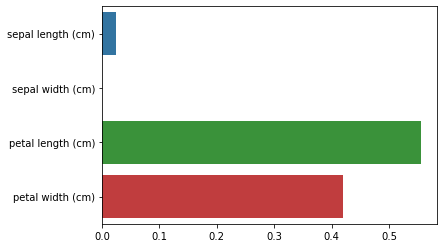

In [12]:
# feature_importances_ : ndarray 형태로 값을 반환하며 피쳐 순서대로 값이 할당됨
import seaborn as sns
import numpy as np

print("Feature importances: \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

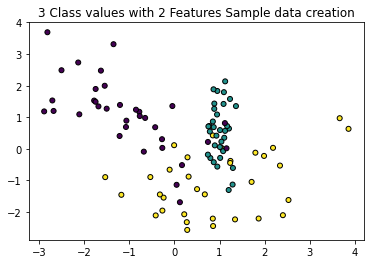

In [13]:
# 결정 트리 과적합

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)

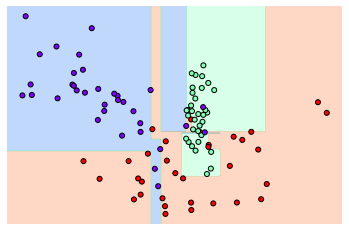

In [17]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    
visualize_boundary(dt_clf, X_features, y_labels)

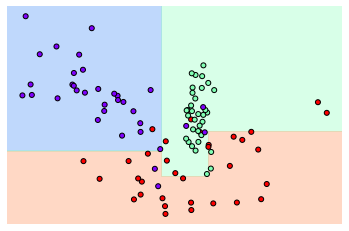

In [18]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)
# 이상치에 덜 반응, 일반화된 분류 규칙에 따라 분류

## 부스팅 알고리즘
- 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
### AdaBoost
### GBM(Gradient Boosting Machine)
- 가중치 업데이트를 경사 하강법을 이용하는 것이 AdaBoost와 큰 차이
- 경사 하강법: 오류값(실제 값 - 예측 값)을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것

In [27]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier (random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(gb_accuracy)
print(time.time()- start_time)

0.9389209365456397
1085.7982177734375


### <GBM 의 파라미터>
- loss: 경사 하강법에서 사용할 비용 함수
- learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률
- n_estimators: weak learner 개수
- subsample: weak learner가 학습에 사용하는 데이터 샘플링의 비율

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators':[100, 500],
    'learning_rate': [0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, paran_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)
print(grid_cv.best_score_)